In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv('Housing.csv')

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0


In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

In [6]:
df.dropna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0


In [7]:
statistics= df.describe()
statistics

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,509.000000,509.000000,506.000000,509.000000,507.000000,509.000000,508.000000,509.000000,508.000000,509.000000,509.000000,509.000000,508.000000,509.000000
mean,3.707516,11.296660,11.198281,0.068762,0.555216,6.279845,68.579134,3.787705,9.610236,409.216110,18.463851,356.664892,12.705276,22.501572
std,8.732089,23.269781,6.856713,0.253298,0.115633,0.703449,28.114744,2.101852,8.735069,168.814161,2.161553,91.562469,7.131979,9.183497
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.880000,45.075000,2.100700,4.000000,279.000000,17.400000,375.330000,7.092500,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.202000,77.150000,3.182700,5.000000,330.000000,19.100000,391.450000,11.430000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.619000,94.100000,5.118000,24.000000,666.000000,20.200000,396.240000,16.992500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


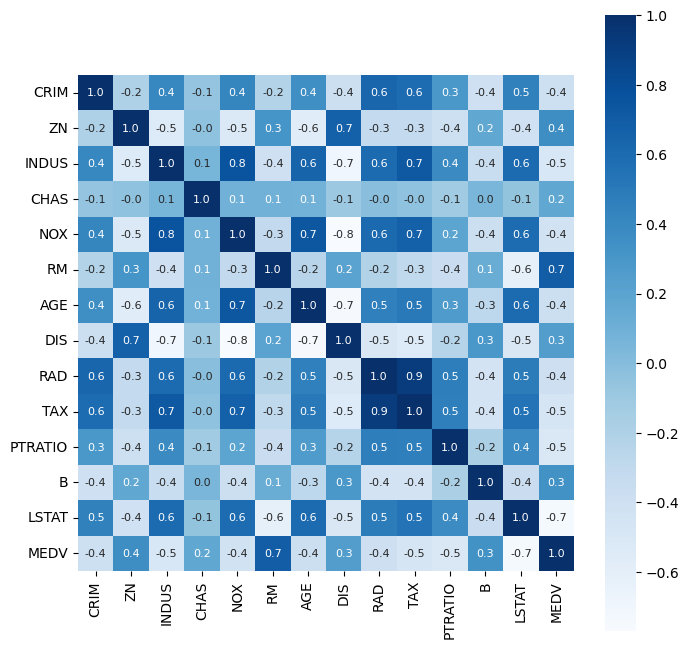

In [8]:
correlation= df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')
plt.show()

In [9]:
data=df.to_numpy()
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [10]:
x= df.drop(['MEDV'],axis=1)
y= df['MEDV']

In [11]:
print(x)
print(y)


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900  1.0  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671  2.0  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671  2.0  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  3.0  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622  3.0  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
504  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786  1.0  273   
505  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875  1.0  273   
506  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675  1.0  273   
507  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889  1.0  273   
508  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050  1.0  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [12]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.2, random_state= 2)
print(x.shape, x_train.shape, x_test.shape)

(509, 13) (407, 13) (102, 13)


In [13]:
model= XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [14]:
train_prediction= model.predict(x_train)
print(train_prediction)

[20.439955  20.98768    7.017443  34.708546  13.899827  16.40531
 22.000256  20.60077   12.694769  18.32271   16.705887  15.002308
 31.604675  17.096052  32.90151   21.199095  23.355375  19.186865
 16.496403  13.50539   49.999928  31.998537  19.81831   17.188694
 19.507053  27.064692  19.394163  11.997684  19.61361   21.100107
 17.533514  18.533161  10.50926   17.418919  23.2969    10.208441
 31.19435   22.187199  29.87232   20.795675  14.105143  24.201744
  7.203311  17.696451  15.601912  15.6041155 12.713432  36.402397
 15.002159  32.19593   17.537296  19.099405  25.118809  19.695343
 18.601755  19.344744  32.703445  13.102251  19.119898  24.797873
 30.061607  21.010685  43.500282  13.3968315 34.578373  27.492163
 49.998573  36.096954  19.488026  20.593714  22.007284  17.591612
 28.200409  37.27822   33.400955  25.286375  49.998257   5.012518
 17.446981  18.37522   22.606789  50.010414  50.000034  23.313482
 23.103838  24.012531  13.400233  24.261253  28.411665  23.807379
 20.403091 

In [18]:
RSE= metrics.r2_score(y_train, train_prediction)
MSE= metrics.mean_absolute_error(y_train, train_prediction)
print('R squared error is', RSE)
print('Mean absolute error is', MSE)

R squared error is, 0.9999968496004666
Mean absolute error is, 0.011269839331324584


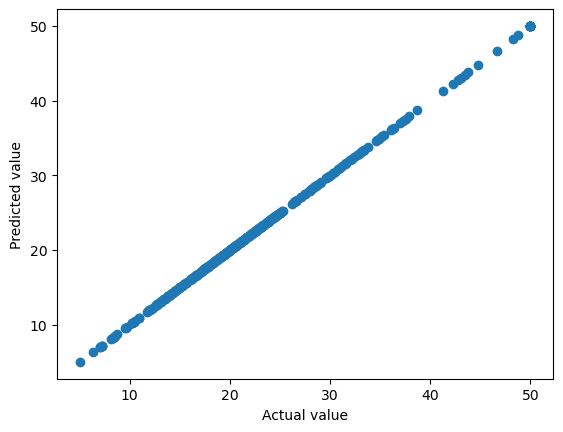

In [23]:
plt.scatter(y_train, train_prediction)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.show()

In [19]:
test_data_prediction= model.predict(x_test)

In [22]:
RSE1= metrics.r2_score(y_test, test_data_prediction)
MSE1= metrics.mean_absolute_error(y_test, test_data_prediction)
print('R squared error is', RSE1)
print('Mean absolute error is', MSE1)

R squared error is 0.9266707968846905
Mean absolute error is 1.9721104229197783


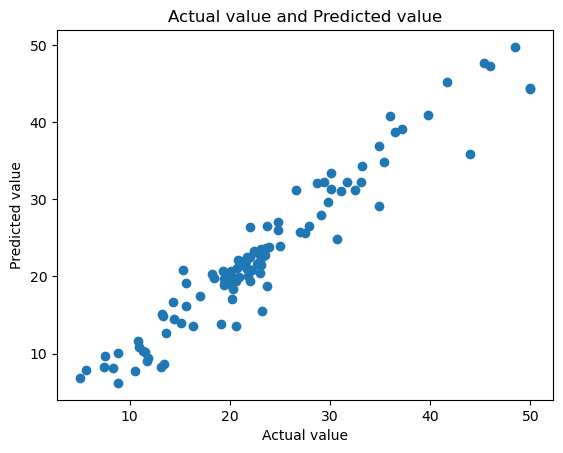

In [25]:

plt.scatter(y_test,test_data_prediction )
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual value and Predicted value')
plt.show()